In [30]:
import numpy as np
from sklearn.svm import SVR, SVC
from utils import read_neutouch_raw, infer, bin_neutouch_signal
import pickle
import glob
import matplotlib.pyplot as plt

In [31]:
folders = ['rod20', 'rod30', 'rod40']

In [32]:
fnames = glob.glob(f'{folders[0]}/*.tact')
fnames.sort()

In [33]:
fnames

['rod20/temp_signal0.tact',
 'rod20/temp_signal1.tact',
 'rod20/temp_signal2.tact',
 'rod20/temp_signal3.tact',
 'rod20/temp_signal4.tact',
 'rod20/temp_signal5.tact',
 'rod20/temp_signal6.tact',
 'rod20/temp_signal7.tact',
 'rod20/temp_signal8.tact',
 'rod20/temp_signal9.tact']

In [54]:
sample_df = read_neutouch_raw(fnames[9])

In [58]:
sample_df.t.iloc[-1] - sample_df.t[0]

0.559999942779541

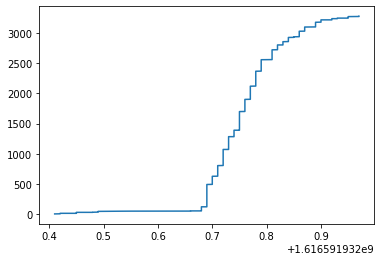

In [60]:
plt.plot( sample_df.t.values, sample_df.isPos.cumsum().values )

In [ ]:
for tool_length in [20,30,50]:
    npzfile = np.load(f'../preprocessed/neutouch_tool_{tool_length}.npz')
    
    X = npzfile['signals'] / 1000
    y = npzfile['labels'] * 100

    X = np.abs(np.fft.fft(X)) / 10
    X = np.reshape(X, (X.shape[0], -1))

    gs_estimator = pickle.load(open('tool' + str(tool_length) +'_fft_svmrbf.pkl', 'rb'))

    print(f'MAE for tool length {tool_length} is {-gs_estimator.score(X, y)}')

In [ ]:
!unzip some_samples.zip